In [4]:
!pip install pafy
!pip install youtube-dl

     |████████████████████████████████| 1.9 MB 4.2 MB/s 


In [5]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import os
import glob
import keras
import gc
# from tensorflow.keras.utils import Sequence
# from tf.keras_video import VideoFrameGenerator

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2162688/45929032 bytes (4.7%)5693440/45929032 bytes (12.4%)9109504/45929032 bytes (19.8%)12754944/45929032 bytes (27.8%)16400384/45929032 bytes (35.7%)20037632/45929032 bytes (43.6%)23625728/45929032 bytes (51.4%)27131904/45929032 bytes (59.1%)30867456/45929032 bytes (67.2%)34414592/45929032 bytes (74.9%)37961728/45929032 bytes (82.7%)41385984/45929032 bytes (90.1%)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
import concurrent.futures 
from time import sleep
import pandas as pd
import time

In [7]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [9]:
def plot_confusion_matrix_labeled(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    # define classes 
    classes = CLASSES_LIST
    temp_df = pd.DataFrame(data=mtx,columns=classes)
    temp_df.index = classes
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(temp_df, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [10]:
def print_validation_report_labeled(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions, target_names= CLASSES_LIST))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
#!pip install keras-video-generators

In [11]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**step 1 load data**

In [ ]:
# !rm '/content/UCF50.rar'

In [ ]:
# !rm -r -f '/content/UCF50' 

In [13]:
!wget -nc --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
!unrar x UCF50.rar -inul -y

--2021-12-06 01:18:27--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  15.8MB/s    in 3m 17s  

2021-12-06 01:21:44 (15.7 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]



In [ ]:
# !mv "/content/UCF50"    "/content/gdrive/MyDrive/UCF50"

In [ ]:
# !cp -r "/content/gdrive/MyDrive/UCF50" "/content/" 

In [ ]:
# !rsync -a -f"+ */" -f"- *" "/content/gdrive/MyDrive/UCF50" "/content/" 

**Step 2: Visualize the Data with its Labels**

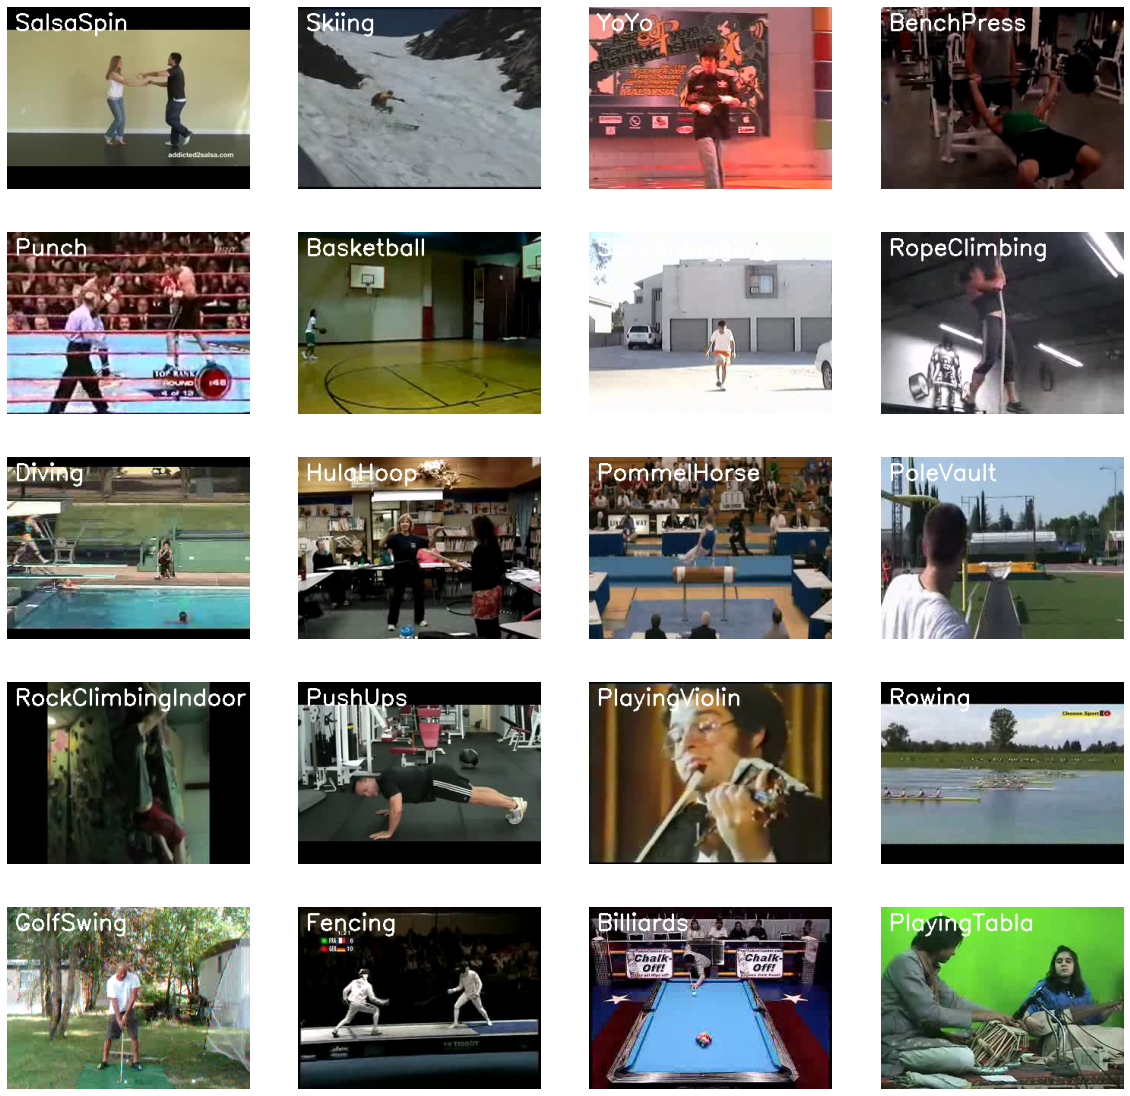

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('UCF50')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [ ]:
datasize = {}
for name in os.listdir('UCF50'):
    datasize[name] = len(os.listdir('UCF50/{}'.format(name)))
   

In [ ]:
import subprocess

def get_length(filename):
    result = subprocess.run(["ffprobe", "-v", "error", "-show_entries",
                             "format=duration", "-of",
                             "default=noprint_wrappers=1:nokey=1", filename],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT)
    return float(result.stdout)

In [14]:
video_size =[]
for filename in os.listdir("UCF50"):
  counter = 1
  for name in os.listdir('UCF50/{}'.format(filename)):
    vidpath = os.path.join("./UCF50", filename,name)
    cap = cv2.VideoCapture(vidpath)
    #cap = cv2.VideoCapture("./video.mp4")
    fps = cap.get(cv2.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count/fps
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height
    video_size.append([filename,counter,duration,frame_count, fps, width,height])
    counter +=1
    
    #print(vidpath)
    #vidcap = cv2.VideoCapture(vidpath)
    #print(vidcap.get(cv2.CAP_PROP_POS_MSEC))

In [15]:
import pandas as pd
vid_des = pd.DataFrame(video_size, columns=['Action','Number of videos','Duration s','Fames count','FPS', 'width','height' ])

In [ ]:
vid_des['Action'].count()

6681

In [ ]:
 vid_des[2:].agg({'Number of videos':"mean",'Duration s': 'mean','Fames count': 'mean','FPS': 'mean', 'width':'mean','height': 'mean'})

Number of videos     68.918401
Duration s            7.441635
Fames count         199.246893
FPS                  26.941366
width               320.047911
height              239.991616
dtype: float64

In [16]:
v_desc = vid_des.groupby("Action").apply(lambda x: x.reset_index())

In [19]:
v_desc.describe()

,index,Number of videos,Duration s,Fames count,FPS,width,height
count,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000
mean,3340.000000,68.898219,7.440237,199.212094,26.942272,320.047897,239.991618
std,1928.782906,41.318854,3.776938,100.768990,2.425138,1.957049,0.342484
min,0.000000,1.000000,1.067733,29.000000,25.000000,320.000000,226.000000
25%,1670.000000,34.000000,4.560000,122.000000,25.000000,320.000000,240.000000
50%,3340.000000,67.000000,6.773433,181.000000,25.000000,320.000000,240.000000
75%,5010.000000,101.000000,9.920000,250.000000,29.970030,320.000000,240.000000
max,6680.000000,197.000000,33.840000,900.000000,29.970030,400.000000,240.000000


In [ ]:
v_desc.agg({'Number of videos': 'count','Duration s': 'mean','Fames count': 'mean','FPS': 'mean', 'width':'mean','height': 'mean'})

Number of videos    6681.000000
Duration s             7.440237
Fames count          199.212094
FPS                   26.942272
width                320.047897
height               239.991618
dtype: float64

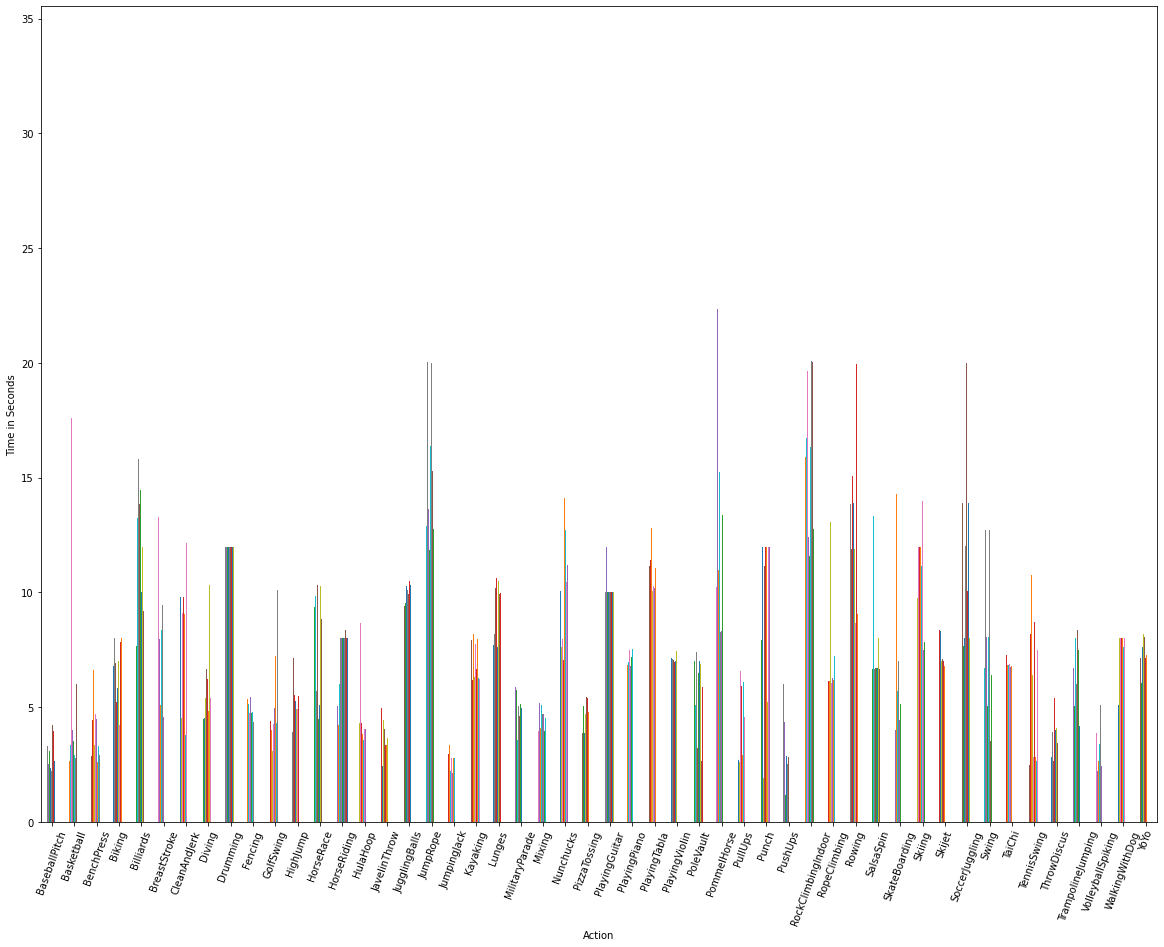

In [ ]:
v_desc[['Duration s']].unstack().plot(kind='bar', legend = False, figsize =(20,15), rot=  70,  ylabel = "Time in Seconds")

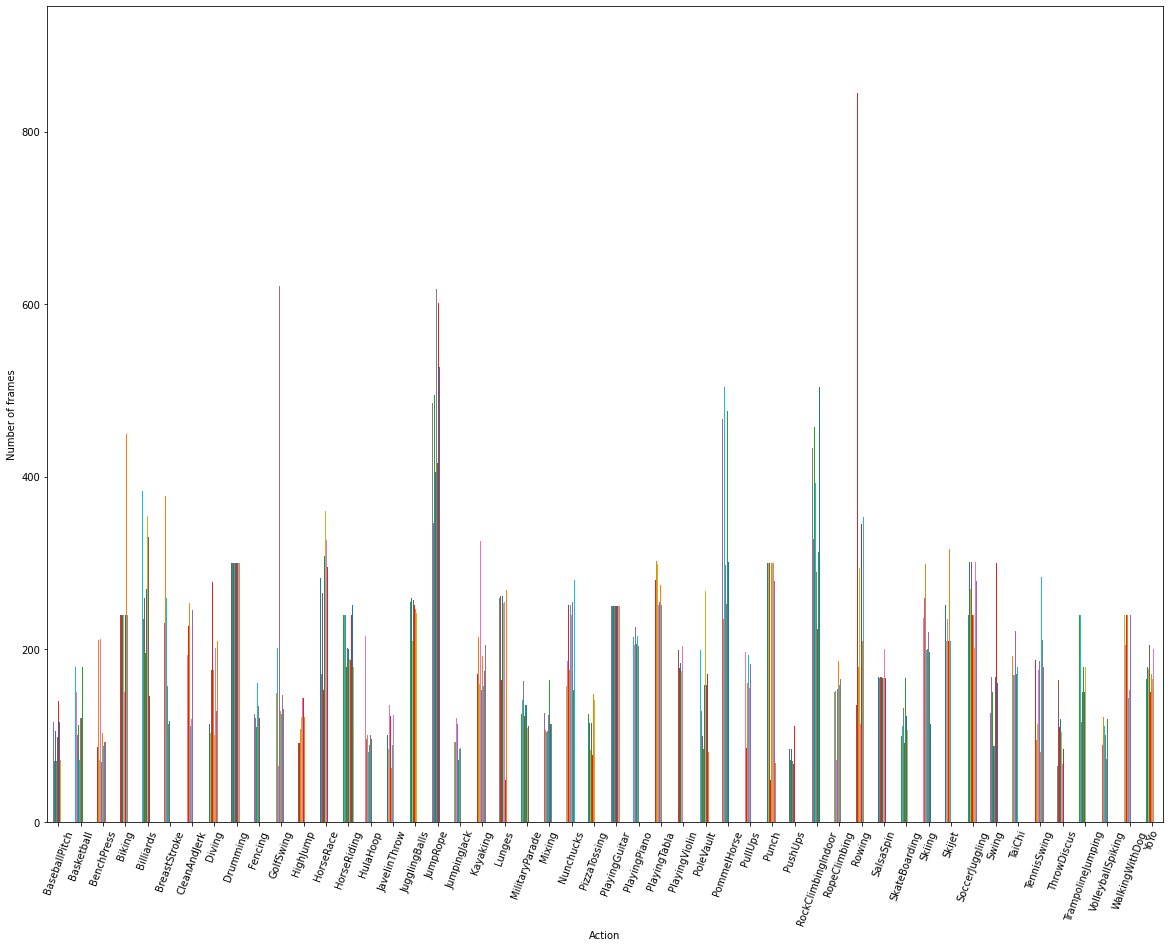

In [ ]:
v_desc[[' Fames count']].unstack().plot(kind='bar', legend = False, figsize =(20,15), rot=  70,  ylabel = "Number of frames")

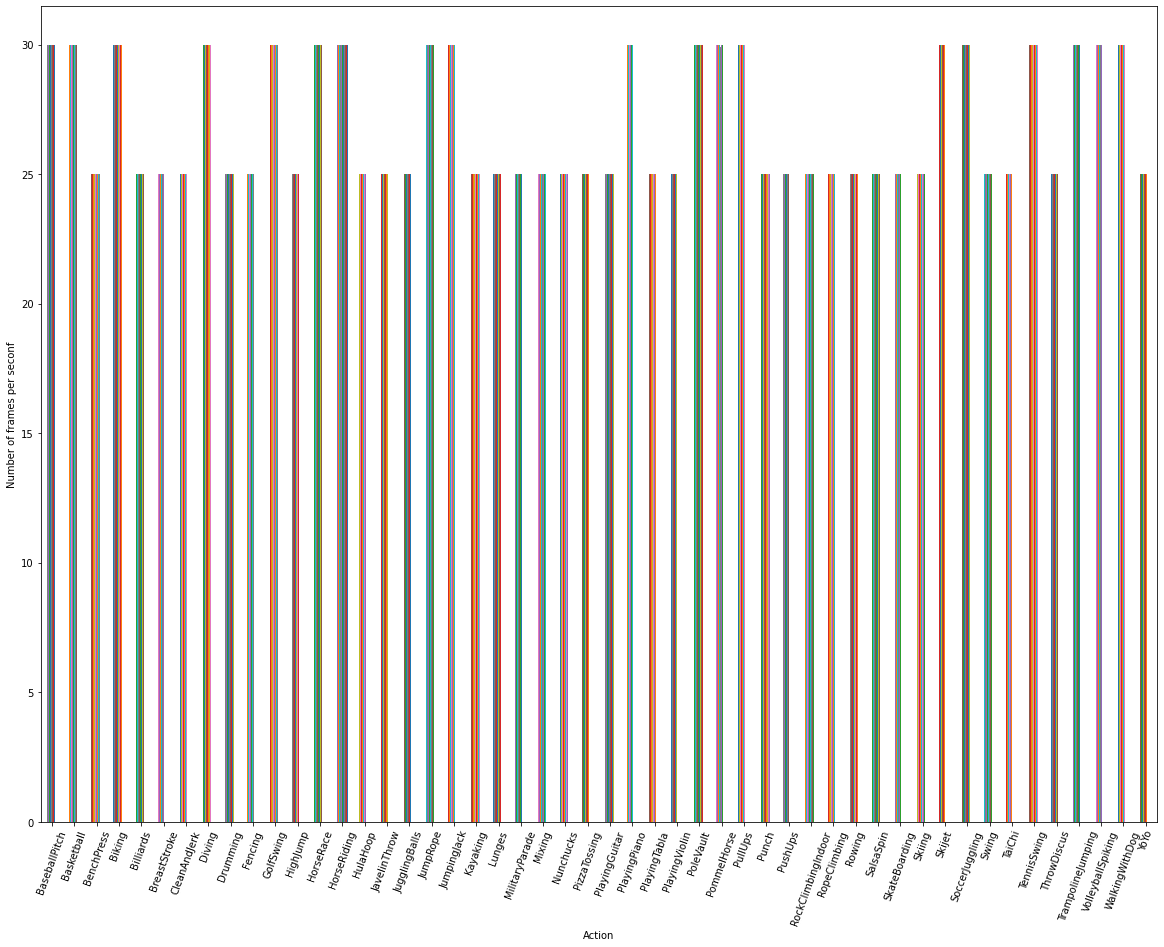

In [20]:
v_desc[['FPS']].unstack().plot(kind='bar', legend = False, figsize =(20,15), rot=  70,  ylabel = "Number of frames per seconf")

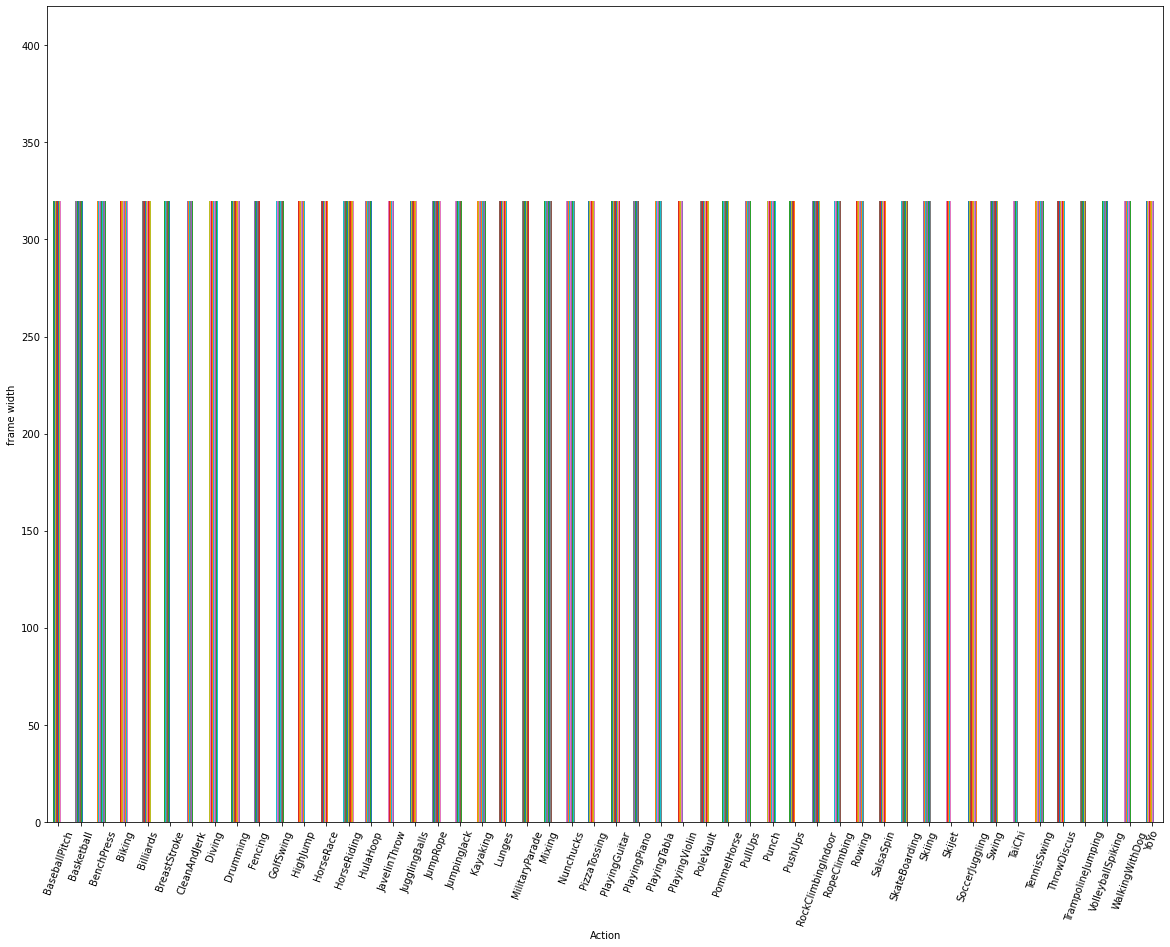

In [21]:
v_desc[['width']].unstack().plot(kind='bar', legend = False, figsize =(20,15), rot=  70,  ylabel = "frame width")

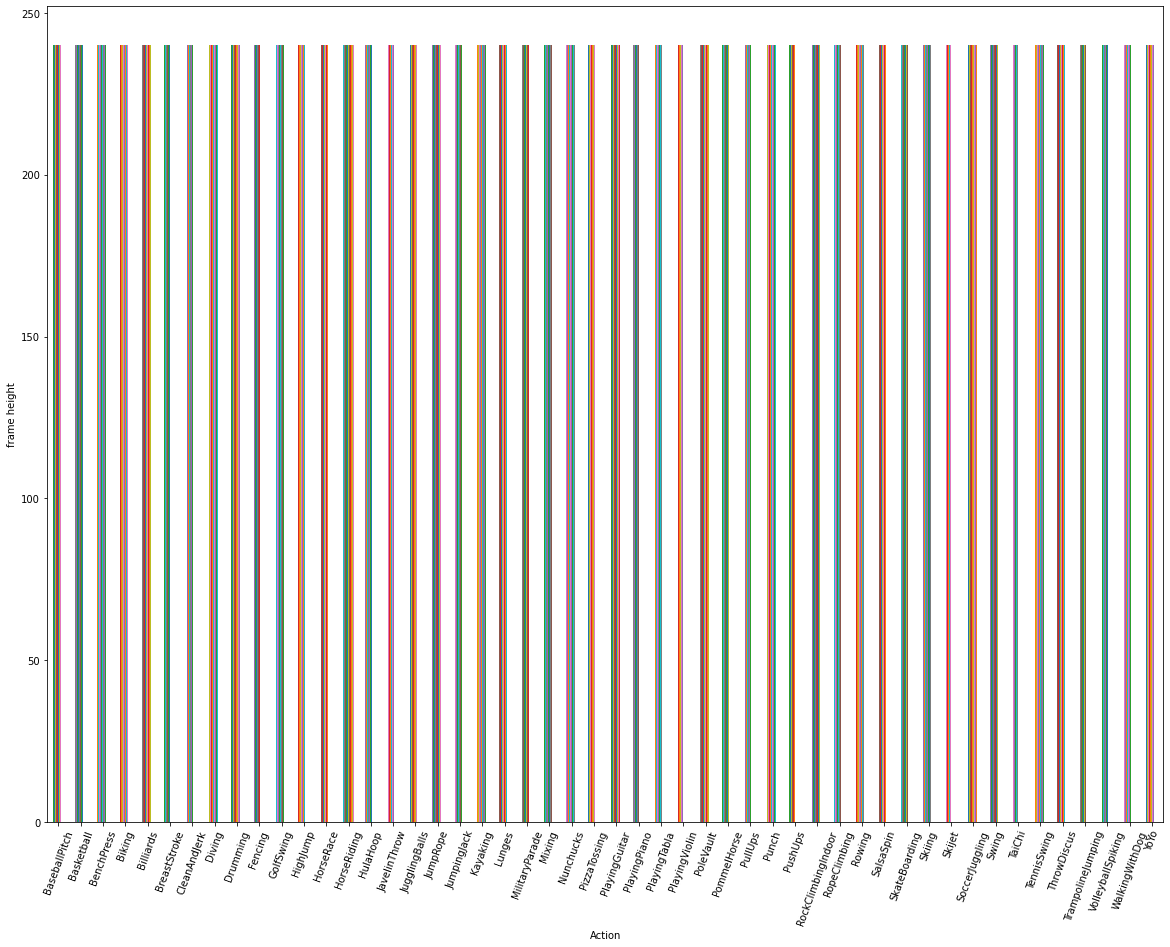

In [22]:
v_desc[['height']].unstack().plot(kind='bar', legend = False, figsize =(20,15), rot=  70,  ylabel = "frame height")

**step 2 preprocess data**

In [ ]:
from pprint import pprint
pprint(CLASSES_LIST,compact=True)

['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards',
 'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing', 'GolfSwing',
 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'JavelinThrow',
 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Lunges',
 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing', 'PlayingGuitar',
 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse',
 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing',
 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet', 'SoccerJuggling', 'Swing',
 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping',
 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']


In [ ]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH =32, 32

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = "UCF50"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.


CLASSES_LIST = sorted(list(os.listdir('/content/gdrive/MyDrive/UCF50')))

**Extract, Resize and Normalize Frames**

In [ ]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list =[] #np.array([])
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    gc.collect()
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 
        gc.collect()

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
        
        gc.collect()
    # Release the VideoCapture object. 
    video_reader.release()
    gc.collect()
    # Return the frames list.
    return frames_list

In [ ]:
# uses # multthreading using process pool
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''

    # Declared Empty Lists to store the features, labels and video file path values.
    feature = []
    label = []
    video_files_paths = []
  
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        gc.collect()
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        video_file_path = []
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path.append(os.path.join(DATASET_DIR, class_name, file_name))

            # Extract the frames of the video file.
        with concurrent.futures.ProcessPoolExecutor() as executor:
          result = executor.map(frames_extraction, video_file_path)

        # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
        # So ignore the vides having frames less than the SEQUENCE_LENGTH.
        for frames in result:
          if len(frames) == SEQUENCE_LENGTH:
        
            # # Append the data to their repective lists.
            feature.append(frames)
            label.append(class_index)
            #video_files_paths.append(video_file_path)
            gc.collect()

            

    # Converting the list to numpy arrays
    features = np.asarray(feature)
    del(feature)
    gc.collect()
    labels = np.array(label) 
    del(label) 
    gc.collect()
    # Return the frames, class index, and video file path.
    return features, labels #, video_files_paths

**Dataset Creation**

In [ ]:


# def create_dataset():
#     '''
#     This function will extract the data of the selected classes and create the required dataset.
#     Returns:
#         features:          A list containing the extracted frames of the videos.
#         labels:            A list containing the indexes of the classes associated with the videos.
#         video_files_paths: A list containing the paths of the videos in the disk.
#     '''

#     # Declared Empty Lists to store the features, labels and video file path values.
#     features = []
#     labels = []
#     video_files_paths = []
  
#     # Iterating through all the classes mentioned in the classes list
#     for class_index, class_name in enumerate(CLASSES_LIST):
#         gc.collect()
#         # Display the name of the class whose data is being extracted.
#         print(f'Extracting Data of Class: {class_name}')
        
#         # Get the list of video files present in the specific class name directory.
#         files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
#         # Iterate through all the files present in the files list.
#         video_file_path = []
#         for file_name in files_list:
            
#             # Get the complete video path.
#             video_file_path.append(os.path.join(DATASET_DIR, class_name, file_name))

#             # Extract the frames of the video file.
#         with concurrent.futures.ThreadPoolExecutor() as executor:
#           result = executor.map(frames_extraction, video_file_path)

#         # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
#         # So ignore the vides having frames less than the SEQUENCE_LENGTH.
#         for frames in result:
#           if len(frames) == SEQUENCE_LENGTH:
        
#             # Append the data to their repective lists.
#             features.append(frames)
#             labels.append(class_index)
#             #video_files_paths.append(video_file_path)
#             gc.collect()

#     # Converting the list to numpy arrays
#     features = np.asarray(features)
#     labels = np.array(labels)  
#     gc.collect()
#     # Return the frames, class index, and video file path.
#     return features, labels #, video_files_paths

**create_dataset method which returns features and labels.**

In [ ]:
nat

[]

In [ ]:
# NUM_THREADS=8
# tf.config.threading.set_inter_op_parallelism_threads(NUM_THREADS)
# tf.config.threading.set_intra_op_parallelism_threads(NUM_THREADS)
# features, labels = create_dataset()

In [ ]:
features.shape

(6681, 20, 32, 32, 3)

In [ ]:
# f, l, v =features.copy(), labels.copy(), video_files_paths.copy()

In [ ]:
# !cat /proc/cpuinfo

In [ ]:
l = []

In [ ]:
# type(video_files_paths)

In [ ]:
# np.save("/content/gdrive/MyDrive/features_32_19", features,allow_pickle=True)

In [ ]:
# np.save("/content/gdrive/MyDrive/labels_32_10", labels ,allow_pickle=True)

In [ ]:
Class_np = np.array(CLASSES_LIST)

In [ ]:
np.save("/content/gdrive/MyDrive/Class_np", Class_np ,allow_pickle=True)

In [ ]:
# np.save("video_files_paths", video_files_paths,allow_pickle=True)

In [ ]:
# !cp -r "/content/features.npy" "/content/gdrive/MyDrive/features" 

In [ ]:
# !cp -r "/content/labels.npy" "/content/gdrive/MyDrive/labels" 

In [ ]:
# !cp -r "/content/video_files_paths" "/content/gdrive/MyDrive/video_files_paths" 

cp: cannot stat '/content/video_files_paths': No such file or directory


In [ ]:
# !cp -r "/content/gdrive/MyDrive/features" "/content/"

In [ ]:
# !cp -r "/content/gdrive/MyDrive/labels"  "/content/" 

In [ ]:
labels = np.load("/content/gdrive/MyDrive/labels_32_10.npy")

In [ ]:
features = np.load("/content/gdrive/MyDrive/features_32_19.npy")

In [ ]:
# video_files_paths = np.load("/content/gdrive/MyDrive/video_files_paths")

In [ ]:
gc.collect()

262

In [ ]:
# !rm -r -f '/content/video_files_paths.npy'

 convert class labels to one hot encoded vectors

In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels, num_classes=50)

 Split the Data into Train and Test Sets

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [ ]:
del(features)

In [ ]:
gc.collect()

203

** Visualize the Data with its Labels for LCRN model**

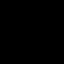

error: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = y_label

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = list(pred_classes_LRCN)

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    #video_reader = cv2.VideoCapture(features_test[random_index])
    
    # Read the first frame of the video file.
    #_, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    #video_reader.release()
    rgb_frame = cv2_imshow(features_test[random_index][4])

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [ ]:
rgb_frame = cv2_imshow(features_test[random_index])

TypeError: ignored

In [ ]:
  _, bgr_frame = video_reader.read()

In [ ]:
type(video_reader)

cv2.VideoCapture

In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
# Some modules to display an animation using imageio.
import imageio
from IPython import display
from tensorflow_docs.vis import embed

In [ ]:
def to_gif(images):
    plt.figure(figsize=(50,50))
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=5)
    return embed.embed_file("animation.gif")

In [ ]:
from google.colab.patches import cv2_imshow


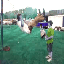

<Figure size 3600x3600 with 0 Axes>

In [ ]:

image = features[0]*255
 
to_gif(image[:20])

In [ ]:
pred_classes_LRCN[4]

17

In [ ]:
y_label[4]

42


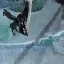

<Figure size 3600x3600 with 0 Axes>

In [ ]:
image = features_test[4]*255
 
to_gif(image[:20])


In [ ]:
CLASSES_LIST[17]

'RockClimbingIndoor'

In [ ]:
   with open('/content/gdrive/MyDrive/classes.txt') as f:
    lines = f.readlines()

In [ ]:
CLASSES_LIST =[]
for i in lines:
  i = i.replace(" ",'')
  i= i.replace("\n","")
  CLASSES_LIST.append(i)

In [ ]:
for i in range(len(pred_classes_LRCN)):
  if pred_classes_LRCN[i] != y_label[i]:
    print (i)